In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
x = Symbol('x')
x1 = np.arange(1,2,0.01)
f = 8*exp(1-x)+7*log(x)

In [3]:
f1=lambdify(x,f)
f2 = f1(x1)

Text(0, 0.5, 'f(x)')

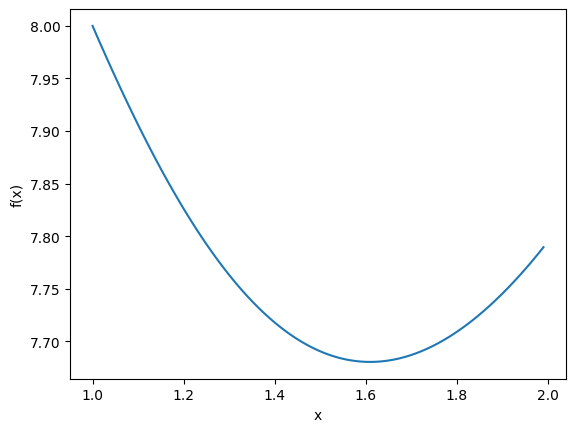

In [4]:
plt.plot(x1,f2)
plt.xlabel('x')
plt.ylabel('f(x)')

Golden Section Search

In [5]:
rho = (3-sqrt(5))/2
a = np.zeros(5)
b = np.zeros(5)
a[0] = 1
b[0] = 2
uncert = 0.23
N=np.ceil(log(uncert/((b[0]-a[0])))/log(1-rho))
print('i' ,2*'\t', 'a[i]' , 2*'\t' , 'fa' , 3*'\t' , 'b[i]' , 4*'\t' , 'fb')

for i in range(1,N+1):
  a[i] = a[i-1] + rho*(b[i-1] - a[i-1])
  b[i] = a[i-1] + (1-rho)*(b[i-1] - a[i-1])
  fa = f1(a[i-1])
  fb = f1(b[i-1])
  if fa < fb :
    b[i-1] = b[i]
    a[i] = a[i-1]
  else :
    b[i] = b[i-1]
    a[i-1] = a[i]

  print(i , '\t' , a[i-1] , '\t' , fa , '\t' , b[i-1] , '\t' , fb)

print(f'travel : [{a[i-1]} , {b[i-1]}]')


i 		 a[i] 		 fa 			 b[i] 				 fb
1 	 1.381966011250105 	 8.0 	 2.0 	 7.795065793291156
2 	 1.381966011250105 	 7.724695924128396 	 1.7639320225002102 	 7.795065793291156
3 	 1.5278640450004206 	 7.724695924128396 	 1.7639320225002102 	 7.699467246801767
4 	 1.5278640450004206 	 7.686003353484317 	 1.6737620787507361 	 7.699467246801767
travel : [1.5278640450004206 , 1.6737620787507361]


Fibonacci

In [6]:
def fibo(n):
    if n<0:
        print("Incorrect input")
    elif n==0:
        return 0
    elif n==1:
        return 1
    else:
        return fibo(n-1)+fibo(n-2)
a = np.zeros(5)
b = np.zeros(5)
a[0] = 1
b[0] = 2
N=0
eps = 0.05
while fibo(N) < ((1+2*eps)/uncert):
  N=N+1

N-=2
print('i' ,'\t' , 'rho[i]' ,2*'\t', 'a[i]' , 2*'\t' , 'fa' , 3*'\t' , 'b[i]' , 3*'\t' , 'fb')
for i in range(1,N+1):
  rho = 1-(fibo(N+1)/fibo(N+2))
  if N==1:
    a[i] = a[i-1] + (rho-eps)*(b[i-1] - a[i-1])
    b[i] = a[i-1] + (1-rho-eps)*(b[i-1] - a[i-1])
  else :
    a[i] = a[i-1] + (rho)*(b[i-1] - a[i-1])
    b[i] = a[i-1] + (1-rho)*(b[i-1] - a[i-1])
    fa = f1(a[i-1])
    fb = f1(b[i-1])
    if fa < fb :
      b[i-1] = b[i]
      a[i] = a[i-1]
    else :
      b[i] = b[i-1]
      a[i-1] = a[i]
    N-=1
  print(i , '\t' , rho , '\t' , a[i-1] , '\t' , fa , '\t' , b[i-1] , '\t' , fb)

print(f'travel : [{a[i-1]} , {b[i-1]}]')




i 	 rho[i] 		 a[i] 		 fa 			 b[i] 			 fb
1 	 0.4 	 1.4 	 8.0 	 2.0 	 7.795065793291156
2 	 0.33333333333333337 	 1.4 	 7.717866024633604 	 1.7999999999999998 	 7.795065793291156
3 	 0.5 	 1.4 	 7.717866024633604 	 1.7999999999999998 	 7.795065793291156
travel : [1.4 , 1.7999999999999998]


Bisection

In [7]:
rho = 0.5
a = np.zeros(5)
b = np.zeros(5)
a[0] = 1
b[0] = 2
uncert = 0.23
N=np.ceil(log(uncert/((b[0]-a[0])))/log(1-rho))
print('i' ,'\t', 'a[i]' , 2*'\t' , 'fa' , '\t' , 'b[i]' , 2*'\t' , 'fb')

for i in range(1,N+1):
  a[i] = a[i-1] + rho*(b[i-1] - a[i-1])
  b[i] = a[i-1] + (1-rho)*(b[i-1] - a[i-1])
  fa = f1(a[i-1])
  fb = f1(b[i-1])
  if fa < fb :
    b[i-1] = b[i]
    a[i] = a[i-1]
  else :
    b[i] = b[i-1]
    a[i-1] = a[i]

  print(i , '\t' , a[i-1] , '\t' , fa , '\t' , b[i-1] , '\t' , fb)

print(f'travel : [{a[i-1]} , {b[i-1]}]')


i 	 a[i] 		 fa 	 b[i] 		 fb
1 	 1.5 	 8.0 	 2.0 	 7.795065793291156
2 	 1.5 	 7.690501034458218 	 1.75 	 7.795065793291156
3 	 1.5 	 7.690501034458218 	 1.625 	 7.696242937476076
travel : [1.5 , 1.625]


Newton's method (example 7.4)

In [8]:
x = Symbol('x')
g = (0.5*x**2)-sin(x)
diff_g = diff(g , x)
diff_g_2 = diff(g,x,2)
g1 = lambdify(x,diff_g)
g2 = lambdify(x,diff_g_2)
x0 = 0.5
eps = 10**(-5)
x1 = x0 - (g1(x0)/g2(x0))
i = 0
while x1-x0 > eps:
  x0 = x1
  x1 = x0 - (g1(x0)/g2(x0))
  i+=1

print ('x1 : ' , x1)
print ('diff(g):',g1(x1))
print('diff(g,2) :',g2(x1))
print('i :', i)

x1 :  0.7391416661498792
diff(g): 9.461538061772412e-05
diff(g,2) : 1.6736538107583572
i : 1


 Secant Method

In [9]:
x = Symbol('x')
h = (0.5*x**2)-sin(x)
diff_h = diff(h , x)
h1 = lambdify(x,diff_h)
x0 = 0.5
x1 = 1
eps = 10**(-5)
i =0
while x1-x0 > eps:

  x2 = x1 - (((x1-x0)*h1(x1))/(h1(x1)-h1(x0)))
  x0 = x1
  x1 = x2
  i+=1

In [10]:
i

1

Bracketing

In [11]:
x = Symbol('x')
f = 8*exp(1-x)+7*log(x)
f1=lambdify(x,f)
a = 1
b = 2
N= 3

for i in range(0,N):
  c = (a+b)/2
  fa = f1(a)
  fb = f1(b)
  fc = f1(c)
  if fa>=fb and fb <=fc :
    a , b = [a , c]
  else:
    a , b = [c , b]


  print(f'travel : [{a} , {b}]')


travel : [1.5 , 2]
travel : [1.75 , 2]
travel : [1.875 , 2]
